In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, roc_auc_score, roc_curve, auc
from sklearn import metrics
from sklearn import tree

In [5]:
df = pd.read_csv('credit.csv')
df.head()

,checking_balance,months_loan_duration,credit_history,purpose,amount,savings_balance,employment_duration,percent_of_income,years_at_residence,age,other_credit,housing,existing_loans_count,job,dependents,phone,default
0,< 0 DM,6,critical,furniture/appliances,1169,unknown,> 7 years,4,4,67,none,own,2,skilled,1,yes,no
1,1 - 200 DM,48,good,furniture/appliances,5951,< 100 DM,1 - 4 years,2,2,22,none,own,1,skilled,1,no,yes
2,unknown,12,critical,education,2096,< 100 DM,4 - 7 years,2,3,49,none,own,1,unskilled,2,no,no
3,< 0 DM,42,good,furniture/appliances,7882,< 100 DM,4 - 7 years,2,4,45,none,other,1,skilled,2,no,no
4,< 0 DM,24,poor,car,4870,< 100 DM,1 - 4 years,3,4,53,none,other,2,skilled,2,no,yes


In [6]:
print(df['checking_balance'].unique())
print(df['credit_history'].unique())
print(df['employment_duration'].unique())
print(df['default'].unique())


['< 0 DM' '1 - 200 DM' 'unknown' '> 200 DM']
['critical' 'good' 'poor' 'perfect' 'very good']
['> 7 years' '1 - 4 years' '4 - 7 years' 'unemployed' '< 1 year']
['no' 'yes']


In [7]:
df2 = df.replace({
    'checking_balance': {'unknown': '0', '< 0 DM': '1', '1 - 200 DM': '2', '> 200 DM': '3'},
    'credit_history': {'critical': '0', 'poor': '1', 'good': '2', 'perfect': '3', 'very good': '4'},
    'employment_duration': {'unemployed': '0', '< 1 year': '1', '1 - 4 years': '2', '4 - 7 years': '3', '> 7 years': '4'},
    'default': {'no': '0', 'yes': '1'}
})

In [8]:
df2

,checking_balance,months_loan_duration,credit_history,purpose,amount,savings_balance,employment_duration,percent_of_income,years_at_residence,age,other_credit,housing,existing_loans_count,job,dependents,phone,default
0,1,6,0,furniture/appliances,1169,unknown,4,4,4,67,none,own,2,skilled,1,yes,0
1,2,48,2,furniture/appliances,5951,< 100 DM,2,2,2,22,none,own,1,skilled,1,no,1
2,0,12,0,education,2096,< 100 DM,3,2,3,49,none,own,1,unskilled,2,no,0
3,1,42,2,furniture/appliances,7882,< 100 DM,3,2,4,45,none,other,1,skilled,2,no,0
4,1,24,1,car,4870,< 100 DM,2,3,4,53,none,other,2,skilled,2,no,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,0,12,2,furniture/appliances,1736,< 100 DM,3,3,4,31,none,own,1,unskilled,1,no,0
996,1,30,2,car,3857,< 100 DM,2,4,4,40,none,own,1,management,1,yes,0
997,0,12,2,furniture/appliances,804,< 100 DM,4,4,4,38,none,own,1,skilled,1,no,0
998,1,45,2,furniture/appliances,1845,< 100 DM,2,4,4,23,none,other,1,skilled,1,yes,1


In [9]:
X = df2.drop('default', axis=1)  # Features (all columns except for the target)
y = df2['default']  # Target variable

In [10]:
# Converting categorical variables to dummy/indicator variables (if necessary)
X = pd.get_dummies(X)

In [11]:
# Splitting data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=24)

# Logistic Regression

In [12]:
# Fitting Logistic Regression Model
logreg = LogisticRegression(max_iter=500)
logreg.fit(X_train, y_train)

c:\Users\milan\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(max_iter=500)

In [13]:
y_pred_logreg = logreg.predict(X_test)

In [14]:
accuracy = metrics.accuracy_score(y_test, y_pred_logreg)
precision = metrics.precision_score(y_test, y_pred_logreg, average='weighted')
recall = metrics.recall_score(y_test, y_pred_logreg, average='weighted')
f1_score = metrics.f1_score(y_test, y_pred_logreg, average='weighted')

# Print evaluation metrics
print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1 Score: {f1_score:.2f}")
print("Logistic Regression Confusion Matrix:\n", confusion_matrix(y_test, y_pred_logreg))

Accuracy: 0.69
Precision: 0.67
Recall: 0.69
F1 Score: 0.68
Logistic Regression Confusion Matrix:
 [[116  22]
 [ 39  23]]


In [15]:
# Calculating metrics for Logistic Regression Model 
print("Logistic Regression Classification Report:\n", classification_report(y_test, y_pred_logreg))
print("Logistic Regression Confusion Matrix:\n", confusion_matrix(y_test, y_pred_logreg))
print("Logistic Regression Accuracy Score:", accuracy_score(y_test, y_pred_logreg))
print("Logistic Regression ROC AUC Score:", roc_auc_score(y_test, y_pred_logreg))

Logistic Regression Classification Report:
               precision    recall  f1-score   support

           0       0.75      0.84      0.79       138
           1       0.51      0.37      0.43        62

    accuracy                           0.69       200
   macro avg       0.63      0.61      0.61       200
weighted avg       0.67      0.69      0.68       200

Logistic Regression Confusion Matrix:
 [[116  22]
 [ 39  23]]
Logistic Regression Accuracy Score: 0.695
Logistic Regression ROC AUC Score: 0.6057737260402057


In [16]:
# Confusion Matrix
confusion = confusion_matrix(y_test, y_pred_logreg)
print('Confusion Matrix:')
print(confusion)

Confusion Matrix:
[[116  22]
 [ 39  23]]


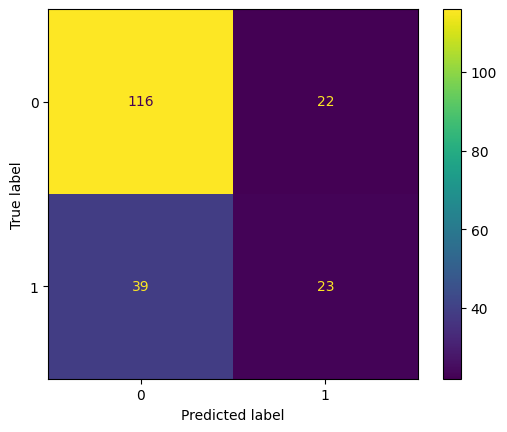

In [17]:
dis = metrics.ConfusionMatrixDisplay(confusion_matrix=confusion)
dis.plot()

In [18]:
import matplotlib.pyplot as plt

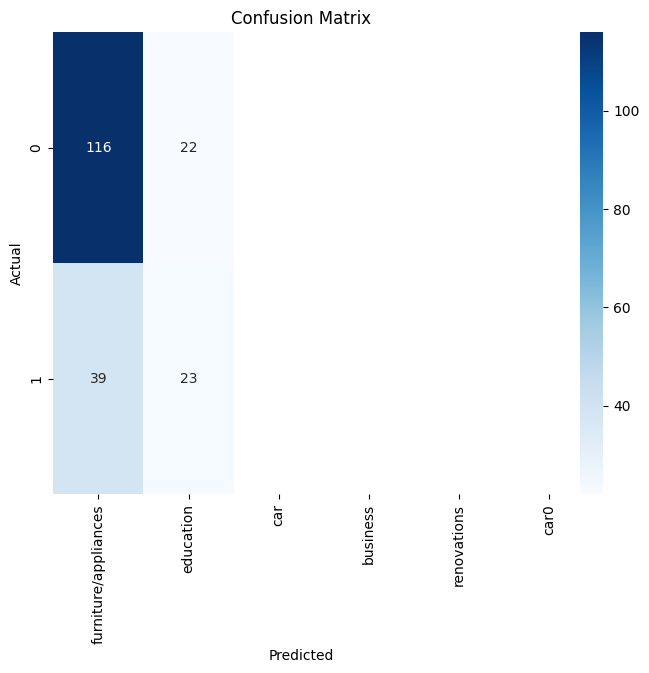

In [21]:
# # Plot the confusion matrix as a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(confusion, annot=True, cmap='Blues', fmt='d', xticklabels=df2["purpose"].unique(),
            yticklabels=df2["default"].unique())
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Decision Tree

In [ ]:
# Fitting Decision Tree Classifier Model
dtree = DecisionTreeClassifier()
dtree.fit(X_train, y_train)

DecisionTreeClassifier()

In [ ]:
y_pred_dtree = dtree.predict(X_test)

In [ ]:
# Evaluate the model's performance
accuracy_Tree = metrics.accuracy_score(y_test, y_pred_dtree)
precision_Tree = metrics.precision_score(y_test, y_pred_dtree, average='weighted')
recall_Tree = metrics.recall_score(y_test, y_pred_dtree, average='weighted')
f1_score_Tree = metrics.f1_score(y_test, y_pred_dtree, average='weighted')

# Print evaluation metrics
print(f"Accuracy_Tree: {accuracy_Tree:.2f}")
print(f"Precision_Tree: {precision_Tree:.2f}")
print(f"Recall_Tree: {recall_Tree:.2f}")
print(f"F1 Score_Tree: {f1_score_Tree:.2f}")

Accuracy_Tree: 0.69
Precision_Tree: 0.68
Recall_Tree: 0.69
F1 Score_Tree: 0.69


In [ ]:
# Calculating metrics for Decision Tree Classifier Model 
print("Decision Tree Classification Report:\n", classification_report(y_test, y_pred_dtree))
print("Decision Tree Confusion Matrix:\n", confusion_matrix(y_test, y_pred_dtree))
print("Decision Tree Accuracy Score:", accuracy_score(y_test, y_pred_dtree))
print("Decision Tree ROC AUC Score:", roc_auc_score(y_test, y_pred_dtree))

Decision Tree Classification Report:
               precision    recall  f1-score   support

           0       0.76      0.80      0.78       138
           1       0.50      0.45      0.47        62

    accuracy                           0.69       200
   macro avg       0.63      0.62      0.63       200
weighted avg       0.68      0.69      0.69       200

Decision Tree Confusion Matrix:
 [[110  28]
 [ 34  28]]
Decision Tree Accuracy Score: 0.69
Decision Tree ROC AUC Score: 0.6243571762505844


In [ ]:
# Confusion Matrix
confusion2 = confusion_matrix(y_test, y_pred_dtree)
print('Confusion Matrix:')
print(confusion2)

Confusion Matrix:
[[110  28]
 [ 34  28]]


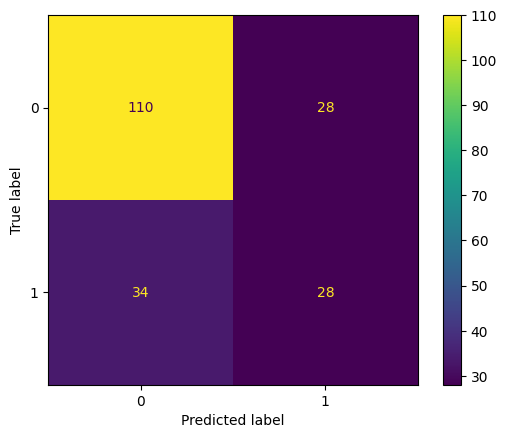

In [ ]:
dis = metrics.ConfusionMatrixDisplay(confusion_matrix=confusion2)
dis.plot()

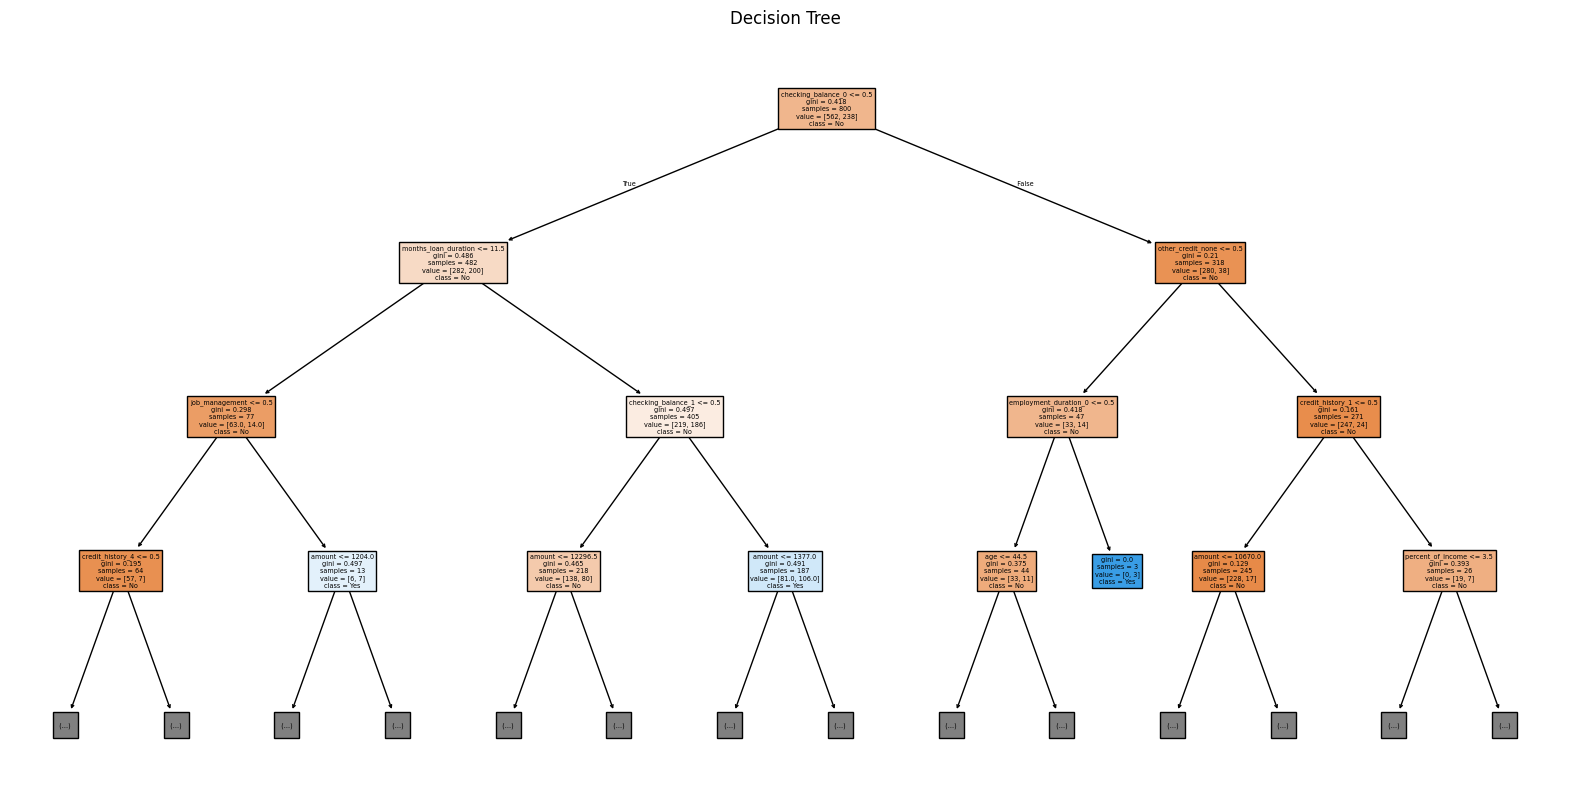

In [ ]:

# Visualize the Decision Tree
plt.figure(figsize=(20, 10))
tree.plot_tree(dtree, filled=True, feature_names=X.columns, class_names=['No', 'Yes'],max_depth=3)
plt.title('Decision Tree')
plt.show()

# Random Forest

In [ ]:
# # Fitting Random Forest Classifier Model
rfc = RandomForestClassifier()
rfc.fit(X_train, y_train)

RandomForestClassifier()

In [ ]:
y_pred_rfc = rfc.predict(X_test)

In [ ]:
# Evaluate Random Forest model
rf_accuracy = metrics.accuracy_score(y_test, y_pred_rfc)
rf_precision = metrics.precision_score(y_test, y_pred_rfc, average='weighted')
rf_recall = metrics.recall_score(y_test, y_pred_rfc, average='weighted')
rf_f1_score = metrics.f1_score(y_test, y_pred_rfc, average='weighted')

# Print evaluation metrics for Random Forest
print("Random Forest Metrics:")
print(f"Accuracy: {rf_accuracy:.2f}")
print(f"Precision: {rf_precision:.2f}")
print(f"Recall: {rf_recall:.2f}")
print(f"F1 Score: {rf_f1_score:.2f}")

Random Forest Metrics:
Accuracy: 0.74
Precision: 0.72
Recall: 0.74
F1 Score: 0.72


In [ ]:
# Calculating metrics for Random Forest Classifier Model 
print("Random Forest Classification Report:\n", classification_report(y_test, y_pred_rfc))
print("Random Forest Confusion Matrix:\n", confusion_matrix(y_test, y_pred_rfc))
print("Random Forest Accuracy Score:", accuracy_score(y_test, y_pred_rfc))
print("Random Forest ROC AUC Score:", roc_auc_score(y_test, y_pred_rfc))

Random Forest Classification Report:
               precision    recall  f1-score   support

           0       0.77      0.89      0.83       138
           1       0.62      0.40      0.49        62

    accuracy                           0.74       200
   macro avg       0.70      0.65      0.66       200
weighted avg       0.72      0.74      0.72       200

Random Forest Confusion Matrix:
 [[123  15]
 [ 37  25]]
Random Forest Accuracy Score: 0.74
Random Forest ROC AUC Score: 0.64726507713885


In [ ]:
# Confusion Matrix
confusion3 = confusion_matrix(y_test, y_pred_rfc)
print('Confusion Matrix:')
print(confusion3)

Confusion Matrix:
[[123  15]
 [ 37  25]]


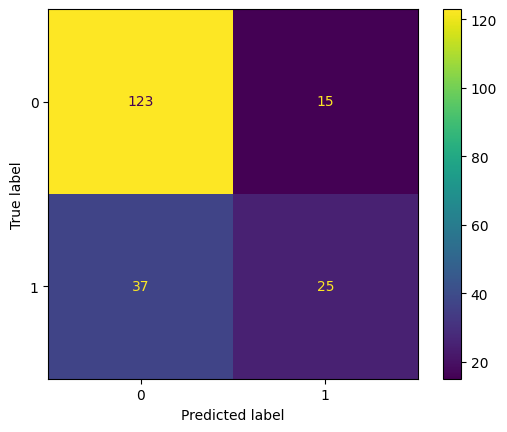

In [ ]:
dis = metrics.ConfusionMatrixDisplay(confusion_matrix=confusion3)
dis.plot()

In [ ]:
# Create and train a Gradient Boosting classifier
gb_clf = GradientBoostingClassifier(n_estimators=100, random_state=42)
gb_clf.fit(X_train, y_train)

GradientBoostingClassifier(random_state=42)

In [ ]:
# Make predictions using Gradient Boosting
gb_y_pred = gb_clf.predict(X_test)
gb_y_pred

array(['1', '0', '0', '0', '1', '0', '0', '0', '1', '0', '1', '0', '0',
       '0', '0', '1', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0',
       '0', '0', '0', '0', '1', '0', '0', '0', '0', '1', '0', '0', '0',
       '0', '0', '1', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0',
       '0', '1', '1', '0', '1', '0', '1', '0', '1', '0', '0', '0', '1',
       '1', '0', '0', '0', '0', '0', '1', '0', '0', '0', '0', '0', '1',
       '0', '0', '0', '1', '1', '1', '0', '0', '0', '0', '0', '0', '0',
       '0', '0', '0', '0', '1', '1', '0', '0', '0', '0', '1', '0', '0',
       '0', '0', '0', '0', '0', '0', '0', '0', '1', '0', '0', '0', '0',
       '0', '0', '0', '0', '0', '0', '0', '1', '0', '0', '1', '0', '1',
       '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0',
       '1', '0', '1', '0', '0', '0', '0', '1', '0', '0', '0', '0', '1',
       '0', '0', '0', '0', '0', '0', '1', '0', '0', '1', '0', '0', '1',
       '0', '0', '0', '0', '0', '0', '0', '0', '0', '1', '1', '0

In [ ]:
# Evaluate Gradient Boosting model
gb_accuracy = metrics.accuracy_score(y_test, gb_y_pred)
gb_precision = metrics.precision_score(y_test, gb_y_pred, average='weighted')
gb_recall = metrics.recall_score(y_test, gb_y_pred, average='weighted')
gb_f1_score = metrics.f1_score(y_test, gb_y_pred, average='weighted')

# Print evaluation metrics for Gradient Boosting
print("\nGradient Boosting Metrics:")
print(f"Accuracy: {gb_accuracy:.2f}")
print(f"Precision: {gb_precision:.2f}")
print(f"Recall: {gb_recall:.2f}")
print(f"F1 Score: {gb_f1_score:.2f}")


Gradient Boosting Metrics:
Accuracy: 0.71
Precision: 0.69
Recall: 0.71
F1 Score: 0.69


In [ ]:
# Confusion Matrix
confusion4 = confusion_matrix(y_test, gb_y_pred)
print('Confusion Matrix:')
print(confusion4)

Confusion Matrix:
[[121  17]
 [ 40  22]]


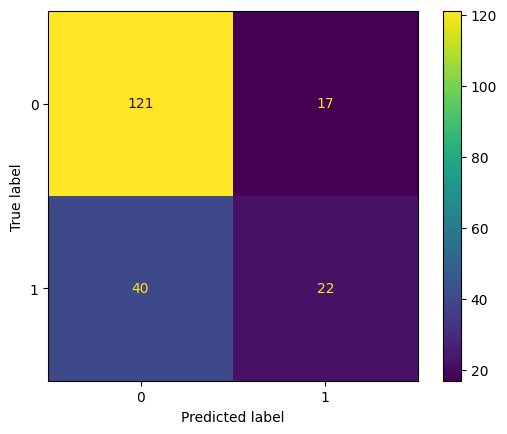

In [ ]:
dis = metrics.ConfusionMatrixDisplay(confusion_matrix=confusion4)
dis.plot()

In [ ]:
# Compare results with single Decision Tree
print("\nComparison with Single Decision Tree:")
print(f"Decision Tree Accuracy: {accuracy:.2f}")
print(f"Random Forest Accuracy: {rf_accuracy:.2f}")
print(f"Gradient Boosting Accuracy: {gb_accuracy:.2f}")


Comparison with Single Decision Tree:
Decision Tree Accuracy: 0.69
Random Forest Accuracy: 0.74
Gradient Boosting Accuracy: 0.71


- Comparing the results with the two Decision Tree model

In [ ]:
# Create and train two separate Decision Tree classifiers
tree1 = DecisionTreeClassifier(random_state=42)
tree1.fit(X_train, y_train)

tree2 = DecisionTreeClassifier(random_state=42, max_depth=3)  # Limited depth for the second tree
tree2.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=3, random_state=42)

In [ ]:
# Make predictions using the two decision trees
tree1_y_pred = tree1.predict(X_test)
tree2_y_pred = tree2.predict(X_test)

In [ ]:
# Evaluate the first decision tree
tree1_accuracy = metrics.accuracy_score(y_test, tree1_y_pred)
tree1_precision = metrics.precision_score(y_test, tree1_y_pred, average='weighted')
tree1_recall = metrics.recall_score(y_test, tree1_y_pred, average='weighted')
tree1_f1_score = metrics.f1_score(y_test, tree1_y_pred, average='weighted')

In [ ]:
# Evaluate the second decision tree
tree2_accuracy = metrics.accuracy_score(y_test, tree2_y_pred)
tree2_precision = metrics.precision_score(y_test, tree2_y_pred, average='weighted')
tree2_recall = metrics.recall_score(y_test, tree2_y_pred, average='weighted')
tree2_f1_score = metrics.f1_score(y_test, tree2_y_pred, average='weighted')

In [ ]:
# Print evaluation metrics for the two decision trees
print("Decision Tree 1 Metrics:")
print(f"Accuracy: {tree1_accuracy:.2f}")
print(f"Precision: {tree1_precision:.2f}")
print(f"Recall: {tree1_recall:.2f}")
print(f"F1 Score: {tree1_f1_score:.2f}")

print("\nDecision Tree 2 Metrics:")
print(f"Accuracy: {tree2_accuracy:.2f}")
print(f"Precision: {tree2_precision:.2f}")
print(f"Recall: {tree2_recall:.2f}")
print(f"F1 Score: {tree2_f1_score:.2f}")

Decision Tree 1 Metrics:
Accuracy: 0.68
Precision: 0.67
Recall: 0.68
F1 Score: 0.67

Decision Tree 2 Metrics:
Accuracy: 0.66
Precision: 0.64
Recall: 0.66
F1 Score: 0.65


In [ ]:
# Compare the results of all models
print("\nComparison of Models:")
print(f"Decision Tree 1 Accuracy: {tree1_accuracy:.2f}")
print(f"Decision Tree 2 Accuracy: {tree2_accuracy:.2f}")
print(f"Random Forest Accuracy: {rf_accuracy:.2f}")
print(f"Gradient Boosting Accuracy: {gb_accuracy:.2f}")


Comparison of Models:
Decision Tree 1 Accuracy: 0.68
Decision Tree 2 Accuracy: 0.66
Random Forest Accuracy: 0.74
Gradient Boosting Accuracy: 0.71
